In [1]:
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo
from scipy.signal import fftconvolve

128
472
521
539
584


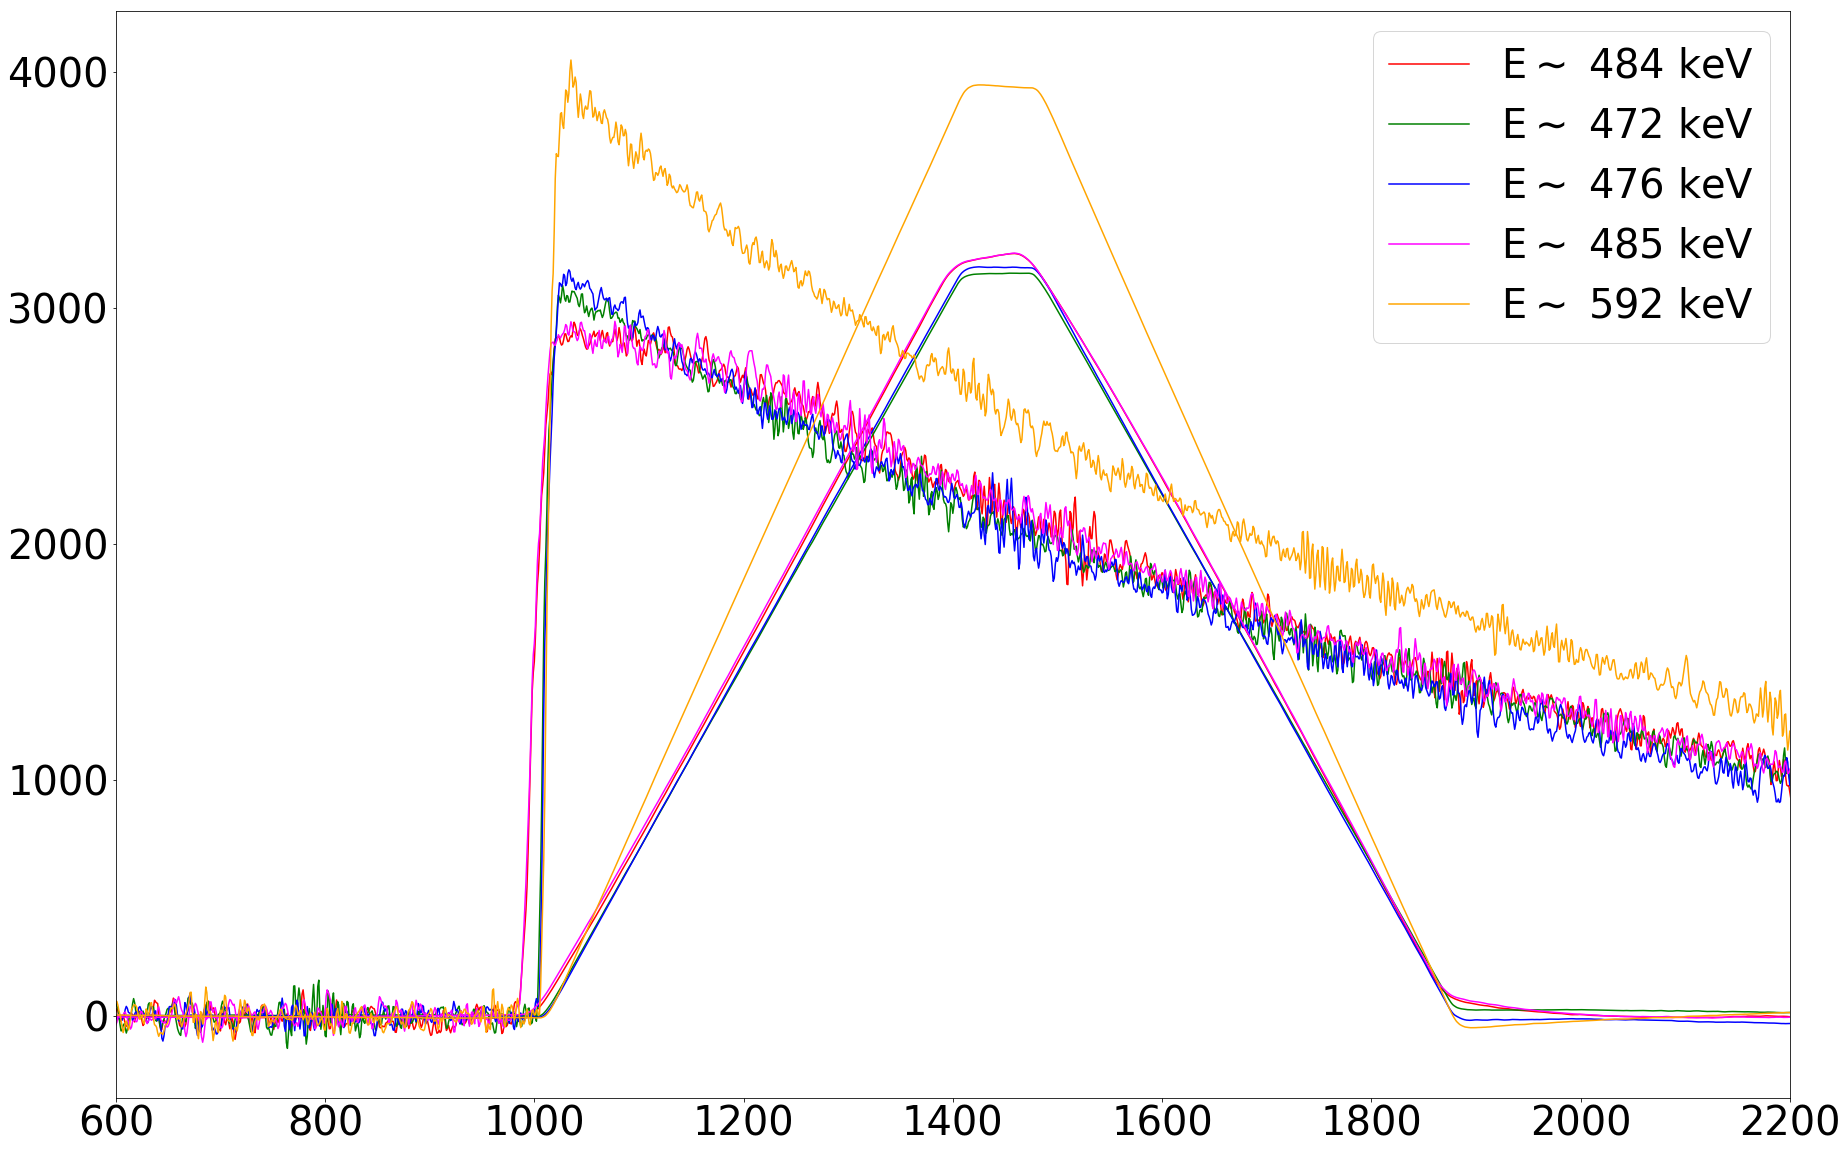

In [34]:
fs=40
t=np.arange(3500)
trp=np.arange(3500)
rise,top,fall=400,70,1050
wo.trap(trp,rise,top,fall)
w=fr.raw('/home/noah/Desktop/large_analysis/ca_analysis/Run_136_0.bin',length=3500,row=1000,numwaves=10000)
w=w[pd.land(w['board']==4,w['channel']==3)]
wo.baseline_restore(w,600)
plt.figure(figsize=(30,20))
cs=np.array(['r','g','b','magenta','orange'],dtype='|S8')
count=0
for i in range(len(w)):
    trap=fftconvolve(w[i]['wave'],trp,mode='full')[0:3500]/(rise*fall)
    if 3075 <max(trap)<5000:
        if count>4:
            break
        plt.plot(t,w[i]['wave'],c=cs[count%5],label=r'E$\sim$ {0:0.0f} keV'.format(max(trap)*0.15))
        plt.plot(t,trap,c=cs[count%5])
        plt.legend(fontsize=fs)
        count+=1
        print i
plt.tick_params(labelsize=fs)
plt.xlim(600,2200)
plt.savefig('Bi_waves_traps')
plt.show()